
# Part A: 



In [1]:
!pip install pygame
!pip install "gymnasium[toy-text]"


In [21]:
# Import
%matplotlib inline
import gymnasium as gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys
import time
from matplotlib import pyplot as plt
from collections import defaultdict
matplotlib.style.use('ggplot')

In [49]:
# Create environment
# change render mode to 'ansi' to run the algorithm fast
env = gym.make('CartPole-v1', render_mode='human')
(state,_) = env.reset()
env.render()

In [4]:
env.step(0)

(array([ 0.04221467, -0.15768602, -0.03252174,  0.30646035], dtype=float32),
 1.0,
 False,
 False,
 {})

In [23]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [24]:
env.observation_space.high

array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)

In [25]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

In [26]:
env.action_space

Discrete(2)

In [27]:
env.spec

EnvSpec(id='CartPole-v1', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'render_mode': 'human'}, namespace=None, name='CartPole', version=1, additional_wrappers=(), vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv')

In [28]:
env.spec.max_episode_steps

500

In [29]:
env.spec.reward_threshold

475.0

In [45]:
episodeNumber=10
timeSteps=100

In [50]:
for episodeIndex in range(episodeNumber):
    initial_state=env.reset() 
    print(episodeIndex)
    env.render()
    appendedObservations=[]
    for timeIndex in range(timeSteps):
        print(timeIndex)
        random_action = env.action_space.sample()
        observation, reward, terminated, truncated, info =env.step (random_action)
        appendedObservations.append(observation)
        time.sleep(0.01)
        if (terminated):
            time.sleep(3)
            break
    if episodeIndex == episodeNumber - 1:
        break 

env.close()

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
3
0
1
2
3
4
5
6
7
8
9
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
8
0
1
2
3
4
5
6
7
8
9
10
11
12
9
0
1
2
3
4
5
6
7
8
9
10
11
12


In [51]:
import numpy as np
import gym

# Define the linear policy function
def policy(state, theta):
    logits = np.dot(theta, state)
    prob = np.exp(logits) / np.sum(np.exp(logits))
    return prob

# REINFORCE algorithm
def reinforce(env, theta, learning_rate, gamma, num_episodes):
    for episode in range(num_episodes):
        states = []
        actions = []
        rewards = []

        state = env.reset()
        done = False

        while not done:
            # Sample action from the policy
            action_probs = policy(state, theta)
            action = np.random.choice(env.action_space.n, p=action_probs)

            # Take action and observe next state and reward
            next_state, reward, done, _ = env.step(action)

            # Store state, action, and reward
            states.append(state)
            actions.append(action)
            rewards.append(reward)

            state = next_state

        # Compute returns for each time step
        returns = []
        G = 0
        for t in range(len(states) - 1, -1, -1):
            G = gamma * G + rewards[t]
            returns.insert(0, G)

        # Updating policy parameters
        for t in range(len(states)):
            action_prob = policy(states[t], theta)[actions[t]]
            grad_log_prob = np.outer(states[t], (actions[t] - action_prob))
            theta += learning_rate * gamma ** t * returns[t] * grad_log_prob

    return theta


if __name__== "_main_":
    env = gym.make('CartPole-v1')
    observation_space_dim = env.observation_space.shape[0]
    action_space_dim = env.action_space.n

    # Initialize policy parameters
    theta = np.random.rand(action_space_dim, observation_space_dim)

    # parameters
    learning_rate = 0.01
    gamma = 0.99
    num_episodes = 1000

    # Run REINFORCE algorithm
    updated_theta = reinforce(env, theta, learning_rate, gamma, num_episodes)


# 1 Ans
 Given, $\Pi(at|St, \theta) = softmax(\theta.St) = [exp(\theta1^TSt)exp(\theta2^TSt)]^T / (exp(\theta1^TSt) + exp(\theta2^TSt))$

the gradient of the logarithm of the policy with respect to parameter $\theta$ :

$\Delta ln\Pi(at|St, \theta) = \Delta(ln(exp(\theta1^TSt)) + ln(exp(\theta2^TSt)) - ln(exp(\theta1^TSt) + exp(\theta2^TSt)))$

$\Delta ln(exp(\Delta 1^T St)) = St $

Similarly, $\Delta ln(exp(\Delta 2^T St)) = St $

$\Delta ln(exp(\Delta 1^T St) + exp(\Delta 2^T St)) = \Delta ln(exp(\Delta 1^T St) + exp(\Delta 2^T St)) $

Using ln(ab) = ln(a) + ln(b);

$ ln(exp(\Delta 1^T St) + exp(\Delta 2^T St)) = ln(exp(\Delta 1^T St)*(1+exp(\Delta 2 ^T St - \Delta2 ^T St))) $

gradient of the expression becomes = $ ln(exp(\Delta 1^T St)) + ln(1 + exp(\Delta 2 ^T St - \Delta2 ^T St)) $



# 2 Ans

In [52]:
import numpy as np
import gym

class REINFORCEAgent:
    def __init__(self, env, learning_rate=0.01, gamma=0.99):
        # Initializing reinforce agent
        self.env = env
        self.learning_rate = learning_rate #for updating policy
        self.gamma = gamma #discount factor
        self.observation_space_dim = env.observation_space.shape[0] #state space dimensionality
        self.action_space_dim = env.action_space.n #action space-number of actions
        #randomly initializing policy parameters
        self.theta = np.random.rand(self.action_space_dim, self.observation_space_dim) 

    def policy(self, state):
        #computing action probability 
        logits = np.dot(self.theta, state) #log probabilities
        prob = np.exp(logits) / np.sum(np.exp(logits)) #softmax to get probabilities
        return prob

    def update_policy(self, states, actions, rewards):
        #updating parameters using reinforce update rule
        returns = self.calculate_returns(rewards) #discounted cumulative rewards
        for t in range(len(states)):
            #gradient of log probabilities
            action_prob = self.policy(states[t])[actions[t]]
            grad_log_prob = np.outer((actions[t] - action_prob), states[t])
            self.theta += self.learning_rate * self.gamma ** t * returns[t] * grad_log_prob

    def calculate_returns(self, rewards):
        returns = []
        #computing return for each time step
        G = 0
        for t in range(len(rewards) - 1, -1, -1):
            G = self.gamma * G + rewards[t]
            returns.insert(0, G)
        return returns

    def train(self, num_episodes):
        all_rewards = [] #stores total rewards in each episode
        #specifing number of episodes
        for episode in range(num_episodes):
            states = []
            actions = []
            rewards = []

            state = self.env.reset()
            done = False

            while not done:
                if isinstance(state, (list, tuple)):
                    state = state[0]
                state = np.array(state)
                action_probs = self.policy(state)
                action = np.random.choice(self.action_space_dim, p=action_probs)
                step_result = self.env.step(action)
                next_state, reward, done, _ = step_result[:4]

                states.append(state)
                actions.append(action)
                rewards.append(reward)

                state = next_state #updating current state

            self.update_policy(states, actions, rewards) #updating parameters 
            all_rewards.append(sum(rewards))

        return all_rewards



if __name__ == "__main__":
    env = gym.make('CartPole-v1') #cartpole environment
    agent = REINFORCEAgent(env) #reinforce agent

    # parameters
    learning_rate = 0.01
    gamma = 0.99 #discount factor
    num_episodes = 1000

    #training the agent
    rewards = agent.train(num_episodes)
    print("Training Rewards:", rewards)

c:\Users\shali\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Training Rewards: [13.0, 36.0, 15.0, 13.0, 14.0, 11.0, 12.0, 13.0, 13.0, 13.0, 15.0, 22.0, 19.0, 16.0, 30.0, 13.0, 22.0, 15.0, 13.0, 11.0, 12.0, 13.0, 19.0, 8.0, 12.0, 15.0, 11.0, 37.0, 20.0, 12.0, 35.0, 13.0, 13.0, 23.0, 24.0, 18.0, 12.0, 15.0, 23.0, 12.0, 10.0, 15.0, 24.0, 10.0, 11.0, 26.0, 11.0, 12.0, 25.0, 13.0, 24.0, 48.0, 9.0, 15.0, 13.0, 35.0, 10.0, 15.0, 10.0, 21.0, 22.0, 10.0, 18.0, 34.0, 19.0, 12.0, 9.0, 18.0, 14.0, 19.0, 19.0, 35.0, 20.0, 15.0, 13.0, 15.0, 31.0, 38.0, 11.0, 14.0, 17.0, 29.0, 19.0, 26.0, 16.0, 19.0, 29.0, 16.0, 31.0, 19.0, 20.0, 15.0, 31.0, 13.0, 16.0, 29.0, 25.0, 16.0, 17.0, 17.0, 16.0, 11.0, 13.0, 19.0, 12.0, 28.0, 40.0, 21.0, 14.0, 11.0, 11.0, 22.0, 26.0, 18.0, 9.0, 14.0, 12.0, 21.0, 10.0, 11.0, 16.0, 18.0, 10.0, 24.0, 17.0, 22.0, 15.0, 24.0, 17.0, 22.0, 25.0, 61.0, 14.0, 13.0, 8.0, 10.0, 26.0, 20.0, 16.0, 16.0, 16.0, 17.0, 10.0, 21.0, 44.0, 68.0, 21.0, 11.0, 39.0, 20.0, 28.0, 10.0, 23.0, 12.0, 10.0, 21.0, 13.0, 21.0, 27.0, 10.0, 10.0, 16.0, 15.0, 40.0, 10

# 3 Ans

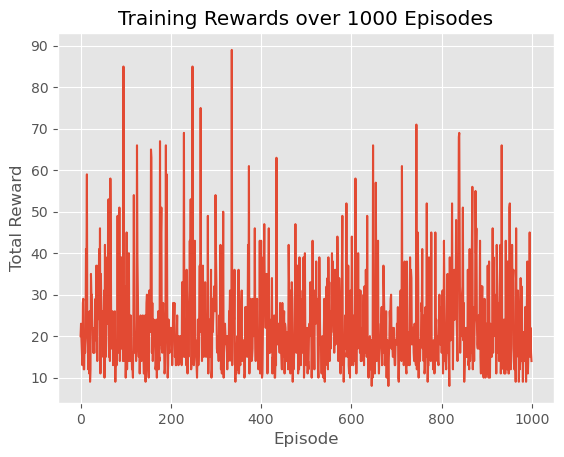

In [53]:
import numpy as np
import gym
import matplotlib.pyplot as plt

class REINFORCEAgent:
    def __init__(self, env, learning_rate=0.01, gamma=0.99):
        #initializing reinforce agent
        self.env = env
        self.learning_rate = learning_rate #for updating policy
        self.gamma = gamma #discount factor
        self.observation_space_dim = env.observation_space.shape[0] #state space dimensionality
        self.action_space_dim = env.action_space.n #action space-number of actions
        #randomly initializing policy parameters
        self.theta = np.random.rand(self.action_space_dim, self.observation_space_dim)

    def policy(self, state):
        #computing action probability
        logits = np.dot(self.theta, state) #log probabilities
        prob = np.exp(logits) / np.sum(np.exp(logits)) #softmax to get probabilities
        return prob

    def update_policy(self, states, actions, rewards):
        #updating parameters using reinforce update rule
        returns = self.calculate_returns(rewards) #discounted cumulative rewards
        for t in range(len(states)):
            #gradient of log probabilities
            action_prob = self.policy(states[t])[actions[t]]
            grad_log_prob = np.outer((actions[t] - action_prob), states[t])
            self.theta += self.learning_rate * self.gamma ** t * returns[t] * grad_log_prob

    def calculate_returns(self, rewards):
        returns = []
        #computing return for each time step
        G = 0
        for t in range(len(rewards) - 1, -1, -1):
            G = self.gamma * G + rewards[t]
            returns.insert(0, G)
        return returns
    

    def train(self, num_episodes):
        all_rewards = [] #stores total rewards in each episode
        #specifing number of episodes
        for episode in range(num_episodes):
            states = []
            actions = []
            rewards = []

            state = self.env.reset()
            done = False

            while not done:
                if isinstance(state, (list, tuple)):
                    state = state[0]
                state = np.array(state)
                action_probs = self.policy(state)
                action = np.random.choice(self.action_space_dim, p=action_probs)
                step_result = self.env.step(action)
                next_state, reward, done, _ = step_result[:4]

                states.append(state)
                actions.append(action)
                rewards.append(reward)

                state = next_state #updating current state

            self.update_policy(states, actions, rewards) #updating parameters
            all_rewards.append(sum(rewards))

        return all_rewards
 

# Main
if __name__ == "__main__":
    env = gym.make('CartPole-v1') #cartpole environment
    agent = REINFORCEAgent(env) #reinforce agent

    #parameters
    learning_rate = 0.01
    gamma = 0.99 #discount factor
    num_episodes = 1000

    # Training the agent
    rewards = agent.train(num_episodes)

    # Plotting rewards
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Training Rewards over 1000 Episodes')
    plt.show()

# 4 Ans

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym

class REINFORCEAgent:
    def _init_(self, learning_rate=0.01, gamma=0.99):
        #initializing reinforce agent
        self.learning_rate = learning_rate #for updating policy
        self.gamma = gamma #discount factor
        self.env = None
        self.action_space_dim = None
        self.state_space_dim = None
        self.theta = None

    def initialize(self, env):
        self.env = env
        self.action_space_dim = env.action_space.n
        self.state_space_dim = env.observation_space.shape[0]
        self.theta = np.random.rand(self.action_space_dim, self.state_space_dim) #randommly initializing parameters

    def policy(self, state):
        state = [s for s in state if np.array(s).shape != ()]
        state_array = np.array([np.array(s) for s in state])
        state_array = state_array.reshape(-1)
        print("Shape of self.theta:", self.theta.shape)
        print("Shape of state_array:", state_array.shape)
        if state_array.size == 0:
            return np.ones(self.action_space_dim) / self.action_space_dim
        else:
            logits = np.dot(self.theta, state_array.reshape(-1,1)) #log probabilities
            prob = np.exp(logits) / np.sum(np.exp(logits))
            prob = np.ravel(prob)
            return prob

    def update_policy(self, states, actions, rewards):
        returns = np.zeros(len(rewards))
        for t in range(len(rewards)):
            Gt = 0
            pw = 0
            for r in rewards[t:]:
                Gt += self.gamma**pw * r
                pw += 1
            returns[t] = Gt
        for t in range(len(rewards)):
            grad_log_prob = np.outer(states[t], (actions[t] - self.policy(states[t])))
            self.theta += self.learning_rate * self.gamma**t * returns[t] * grad_log_prob

    def train(self, num_episodes):
        all_rewards = []
        for episode in range(num_episodes):
            state = self.env.reset()
            states = []
            actions = []
            rewards = []
            while True:
                action_probs = self.policy(state)
                action = np.random.choice(self.action_space_dim, p=action_probs)
                step_result = self.env.step(action)
                next_state = step_result[0]
                reward = step_result[1]
                done = step_result[2]
                states.append(state)
                actions.append(action)
                rewards.append(reward)
                state = next_state
                if done:
                    break
            
            all_rewards.append(sum(rewards))
        return all_rewards

    def run_episode(self):
        state = self.env.reset()
        total_reward = 0
        while True:
            action_probs = self.policy(state)
            action = np.random.choice(self.action_space_dim, p=action_probs)
            step_result = self.env.step(action)
            next_state, reward, done, _ = step_result[:4]
            total_reward += reward
            state = next_state
            if done:
                break
        return total_reward

# environment
env = gym.make('CartPole-v1')

# agent Initialization
agent = REINFORCEAgent()
agent.initialize(env)

# Training the agent
num_episodes = 1000
rewards = agent.train(num_episodes)


# Test the trained policy and compute the average reward over 5 episodes
test_rewards = [agent.run_episode() for _ in range(5)]
avg_test_reward = np.mean(test_rewards)
print("Average test reward:", avg_test_reward)


Shape of self.theta: (2, 4)
Shape of state_array: (4,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (4,)
Shape of s

c:\Users\shali\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of self.theta: (2, 4)
Shape of state_array: (0,)
Shape of s

# 5 Ans

In [3]:
import numpy as np

class REINFORCE_Baseline:
    def __init__(self, state_dim, action_dim):
        pass

    def select_action(self, state, theta):
        return np.random.choice([0, 1])  #binary action space

    def update(self, states, actions, rewards, gamma, alpha_theta, alpha_w, w, theta):
        T = len(states)
        G = np.zeros(T)
        delta_w = np.zeros_like(w)
        delta_theta = np.zeros_like(theta)

        for t in range(T):
            G[t] = sum(gamma ** (k - t - 1) * rewards[k] for k in range(t, T))
            delta_w += alpha_w * (G[t] - np.dot(states[t], w)) * states[t]
            delta_theta += alpha_theta * gamma ** t * G[t] * (1 - theta[actions[t]]) * states[t]

        w += delta_w
        theta += delta_theta

        return w, theta

class CustomEnvironment:
    def __init__(self):
        self.observation_space_dim = 4  
        self.action_space_dim = 2 
    def generate_episode(self, agent):
        states = []
        actions = []
        rewards = []
        state = self.reset()
        done = False
        
        while not done:
            states.append(state)
            action = agent.select_action(state, theta)
            next_state, reward, done = self.step(action)
            actions.append(action)
            rewards.append(reward)
            state = next_state
        return states, actions, rewards
    def reset(self):
        return np.random.rand(4)  

    def step(self, action):
        next_state = np.random.rand(4)
        reward = np.random.rand()
        done = False
        return next_state, reward, done


env = CustomEnvironment()
agent = REINFORCE_Baseline(state_dim = 4, action_dim = 2)

# parameters
w = np.zeros(4) 
theta = np.zeros(2)  #  binary action space

#  parameters
num_episodes = 1000
gamma = 0.99
alpha_theta = 0.01
alpha_w = 0.01

# Training the agent
for _ in range(num_episodes):
    states, actions, rewards = env.generate_episode(agent)
    w, theta = agent.update(states, actions, rewards, gamma, alpha_theta, alpha_w, w, theta)

KeyboardInterrupt: 

# 6 Ans

In [5]:
import numpy as np
import matplotlib.pyplot as plt


class CustomEnvironment:
    def _init_(self):
       
        self.observation_space_dim = 4 
        self.action_space_dim = 2  

    def generate_episode(self, agent):
        states = []
        actions = []
        rewards = []

        state = self.reset()
        done = False

        while not done:
            states.append(state)
            action = agent.select_action(state)
            next_state, reward, done = self.step(action)
            actions.append(action)
            rewards.append(reward)
            state = next_state

        return states, actions, rewards

    def reset(self):
        return np.random.rand(self.observation_space_dim)

    def step(self, action):
        
        next_state = np.random.rand(self.observation_space_dim)
        reward = np.random.rand()  # random value
        done = False  
        return next_state, reward, done
# REINFORCE algorithm
def train_REINFORCE(env, agent, num_episodes, gamma, alpha_theta, alpha_w):
    rewards_history = []
    for _ in range(num_episodes):
        states, actions, rewards = env.generate_episode(agent)
        w, theta = agent.update(states, actions, rewards, gamma, alpha_theta, alpha_w, w, theta)
        rewards_history.append(sum(rewards))
    return rewards_history

# REINFORCE with Baseline algorithm
def train_REINFORCE_Baseline(env, agent, num_episodes, gamma, alpha_theta, alpha_w):
    rewards_history = []
    for _ in range(num_episodes):
        states, actions, rewards = env.generate_episode(agent)
        w, theta = agent.update(states, actions, rewards, gamma, alpha_theta, alpha_w, w, theta)
        rewards_history.append(sum(rewards))
    return rewards_history

# environment and agent for both algorithms
env = CustomEnvironment()
agent_REINFORCE = train_REINFORCE()
agent_REINFORCE_Baseline = train_REINFORCE_Baseline()

#parameters
num_episodes = 1000
gamma = 0.99
alpha_theta = 0.01
alpha_w = 0.01

# Training both algorithms and record rewards
rewards_REINFORCE = train_REINFORCE(env, agent_REINFORCE, num_episodes, gamma, alpha_theta, alpha_w)
rewards_REINFORCE_Baseline = train_REINFORCE_Baseline(env, agent_REINFORCE_Baseline, num_episodes, gamma, alpha_theta, alpha_w)

# Ploting 
plt.plot(np.arange(1, num_episodes+1), rewards_REINFORCE, label='REINFORCE')
plt.plot(np.arange(1, num_episodes+1), rewards_REINFORCE_Baseline, label='REINFORCE with Baseline')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Training Performance')
plt.legend()
plt.show()

TypeError: train_REINFORCE() missing 6 required positional arguments: 'env', 'agent', 'num_episodes', 'gamma', 'alpha_theta', and 'alpha_w'